# What are the most competitive states in Nigeria?

Lagos is Nigeria’s flagship state. Despite being the smallest geographically, it accounts for roughly 15% of Nigeria’s GDP and 13% of its population. Its economy outcompetes at least 45 African countries and it has the highest literacy rate in the country (92%). Lagos often resides in the top 5 of every noteworthy metric in the country, if not in its usual first place. 

For a state to be competitive, it must enable business environments, possess resources and human capital, have good infrastructure, and be generally safe for business with a high consumer market. Competitive states are good at attracting investment and creating jobs that help reduce poverty and unemployment.

That out of the way, what does the data say?

## What are the metrics of note?

|Metric|Description|Range|Weight|
|-------------------|-------------------|:----------------:|----------------|
|IHDI|**Income-Adjusted Human Development Index.** A composite index to measure the quality of life, level of knowledge, and standard of living of a state while accounting for the inequalities within the state. The higher this metric the better.|0-1|6|
|IGR per Capita | "**Internally Generated Revenue.** The internally generated revenues obtained within the state, majorly from taxes as reported by the National Bureau of Statistics. The higher this metric, the better."|0-1|5|
|MPI|"**Multidimensional Poverty Index.** Measures the share of the population that is multi-dimensionally poor, adjusted by the intensity of deprivation. It accounts for inadequate amenities, health, nutrition, education, housing conditions, and a lack of job. Lower is better."|0-1|4|
|Literacy|**Literacy rate.** The proportion of the adult population aged 15 years and over which is literate, expressed as a percentage of the corresponding population. Higher is better.|0-100|3|
|Unemployment|"**Unemployment Rate.** The proportion of people (aged 15-64) who are looking for and are available for work, but are unable to secure a job. Lower is better."|0-100|2|
|Avg Food Item Price|**Average Food Item Price.** The average price of selected food items in Naira as curated by the National Bureau of Statistics for the state in September 2022. Lower is better.|None|1|
|Accidents/100k persons|**Accidents per 100,000 persons.** An indirect measure of infrastructure by accounting the number of recorded road traffic accidents per 100,000 persons in state. Lower is better.|None|1|
|Crimes/100k persons|**Crimes per 100,000 persons.** A measure of how safe the state is, i.e., the number of reported crimes per 100,000 persons in state. Lower is better.|None|1|

Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from soccerplots.radar_chart import Radar

Load data and sort by IHDI

In [2]:
data = pd.read_csv("competitiveness data 2016-2017.csv", index_col=0)

#select columns of interest
radar_data = data.iloc[:, -8:]
radar_data = radar_data.sort_values(['IHDI', 'MPI'], ascending=[False, True])

radar_data["Unemployment"] = data['Unemployment'] * 100
radar_data['Accidents/100k persons'] = data['Road Traffic Accidents (2021)']/data.Population * 100000
radar_data['Crimes/100k persons'] = data['Reported Crimes']/data.Population * 100000
radar_data.drop(['Reported Crimes', 'Road Traffic Accidents (2021)'], axis=1, inplace=True)

last_column = radar_data.pop('IHDI')
  
radar_data.insert(7, 'IHDI', last_column)

radar_data.sort_values(by='IHDI', ascending=False, inplace=True)

## Score and rank the top states

A weighted score was created to help normalise the values and rank the states on a scale of 0-1.

$$
score = \frac{6I + 5\frac{Ig}{Ig_{max}} + 4(1-M) + 3\frac{L}{100} + 2\frac{U}{100} + (1-\frac{C}{C_{max}}) + (1-\frac{A}{A_{max}}) + (1-\frac{F}{F_{max}})}{23}$$

where $I$=IHDI;
$Ig$=IGR per Capita;
$M$=MPI;
$L$=Literacy Rate;
$U$=Unemployment Rate;
$C$=Crimes per 100000 persons;
$A$=Accidents per 100,000 persons;
$F$=Average Food Price;

In [3]:
scored_data = radar_data.copy()
scored_data['Score'] =(
        5*(radar_data['IGR per Capita (2021)']/max(radar_data['IGR per Capita (2021)']))\
            +6*radar_data['IHDI']+3*radar_data['Literacy']/100\
                +2*(1 - radar_data['Unemployment']/100) + 4*(1 - radar_data['MPI'])\
                    +(1 - radar_data['Avg Food Item Price (Sep 2022)']/max(radar_data['Avg Food Item Price (Sep 2022)']))\
                        +(1 - radar_data['Accidents/100k persons']/max(radar_data['Accidents/100k persons']))\
                            + (1 - radar_data['Crimes/100k persons']/max(radar_data['Crimes/100k persons']))
)/23

scored_data.sort_values('Score', ascending = False, inplace=True)
scored_data.head(11)

,IGR per Capita (2021),Literacy,Unemployment,MPI,Avg Food Item Price (Sep 2022),Accidents/100k persons,Crimes/100k persons,IHDI,Score
STATE,,,,,,,,,
LAGOS,58989.393760,92.1,37.143890,0.1023,1043.105723,4.666135,399.087630,0.4852,0.721268
FCT,48816.802800,61.4,40.403511,0.1744,1214.181637,41.332972,199.153137,0.4472,0.595813
OGUN,16943.483990,62.8,16.363226,0.1149,1042.608028,20.537317,26.928948,0.3854,0.541811
OSUN,5157.741349,80.0,11.654413,0.0621,922.077062,9.534157,70.066616,0.3667,0.540206
DELTA,15111.252750,65.7,31.143144,0.1169,1105.285990,4.050839,134.713934,0.4037,0.533873
RIVERS,17533.510790,70.7,41.592318,0.2232,1168.388303,1.492543,22.317072,0.3939,0.531970
ONDO,6204.384430,72.8,17.089386,0.1202,919.234883,9.235957,74.712654,0.3593,0.517815
EKITI,4065.314310,74.7,32.207767,0.1154,989.680829,4.268146,64.798214,0.4068,0.516388
KWARA,8271.231734,49.3,16.551779,0.1612,664.813583,12.087324,25.463145,0.3448,0.495397


How do they fare by region?

In [33]:
scored_region_data = scored_data.copy()
scored_region_data['Region'] = data.Region
scored_region_data.sort_values(['Region', 'Score'], ascending=[True, False], inplace=True)

all_regions = list(scored_region_data.Region.unique())

for region in all_regions:
    states = scored_region_data[scored_region_data.Region == region]
    best_score = states.Score.max()
    best_state = states[states.Score == best_score].index
    
    print(f'{region}: {best_state} is the best state, with a score of {best_score}')


North Central: Index(['FCT'], dtype='object', name='STATE') is the best state, with a score of 0.5958132074889029
North East: Index(['ADAMAWA'], dtype='object', name='STATE') is the best state, with a score of 0.4096469609564084
North West: Index(['KANO'], dtype='object', name='STATE') is the best state, with a score of 0.4034564513165399
South East: Index(['ENUGU'], dtype='object', name='STATE') is the best state, with a score of 0.4948915735131827
South South: Index(['DELTA'], dtype='object', name='STATE') is the best state, with a score of 0.5338725179480059
South West: Index(['LAGOS'], dtype='object', name='STATE') is the best state, with a score of 0.7212678889727921


## Radar chart function

Create function to compare states with a radar chart

In [5]:
def compare_states(data, sec_state, ref_state, **kwargs): 
    """Compare two states in dataset using the parameters available in the dataset

    Args:
        data (DataFrame): DataFrame from which to access the data
        sec_state (str): State to compare against reference
        ref_state (str): Reference state for comparison
    """
    
    ref_color = "red"
    sec_color = "blue"
       
    #get params
    params = list(data.columns)
    params
    
    # add ranges to list of tuple pairs
    ranges = []
    ref_values = []
    sec_values = []

    ranges = [
        (
            min(data[params][i]), 
            max(data[params][i])
            )
            for i in params
    ]

    for x in range(len(data)):
        if data.index[x].upper() == ref_state.upper():
            ref_values = data.iloc[x].values.tolist()
        if data.index[x].upper() == sec_state.upper():
            sec_values = data.iloc[x].values.tolist()
            
    values = [ref_values, sec_values]
    
    # create chart title
    title = dict(
        title_name = sec_state,
        title_color = sec_color,
        title_name_2 = ref_state,
        title_color_2 = ref_color,
        title_fontsize = 18,  
    )

    endnote = 'Created by: Farook Ajose \nData via Natural Bureau of Statistics'


    radar = Radar()

    fig, ax = radar.plot_radar(
        ranges=ranges,
        params=params,
        values=values,
        radar_color=[ref_color, sec_color],
        alphas=[0.5,0.4],
        title=title,
        endnote=endnote,
        compare=True,
    )

## How do the top states compare against Lagos?

findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.


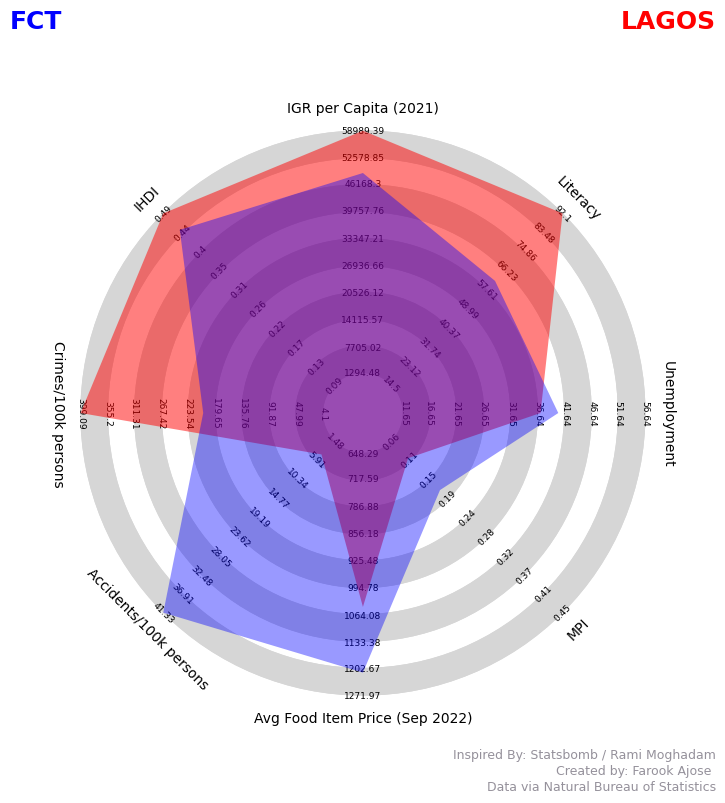

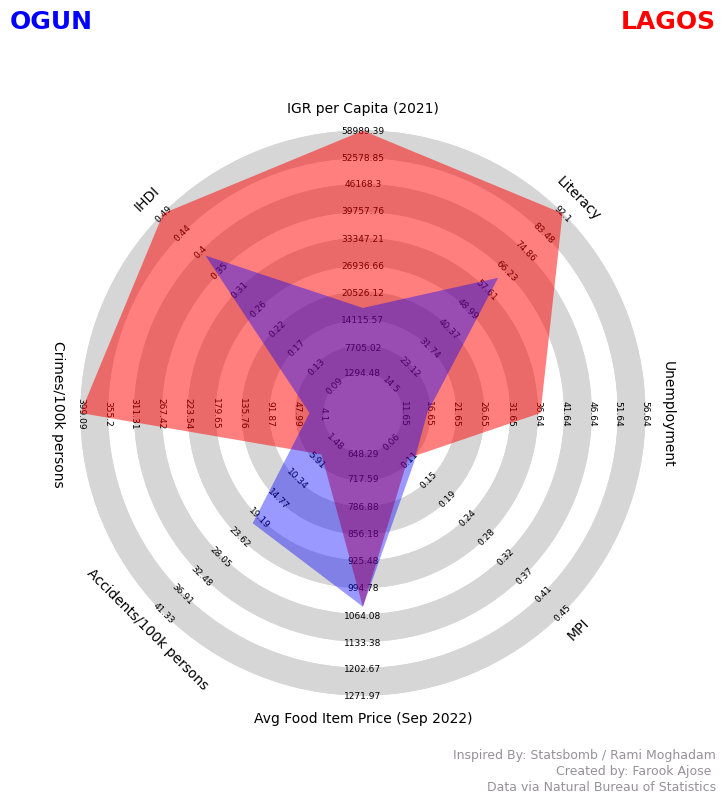

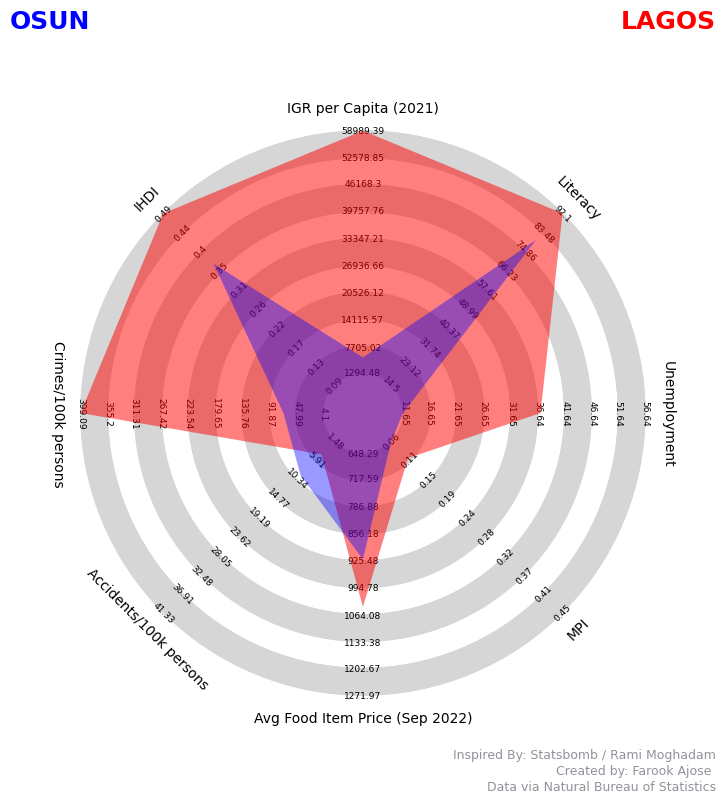

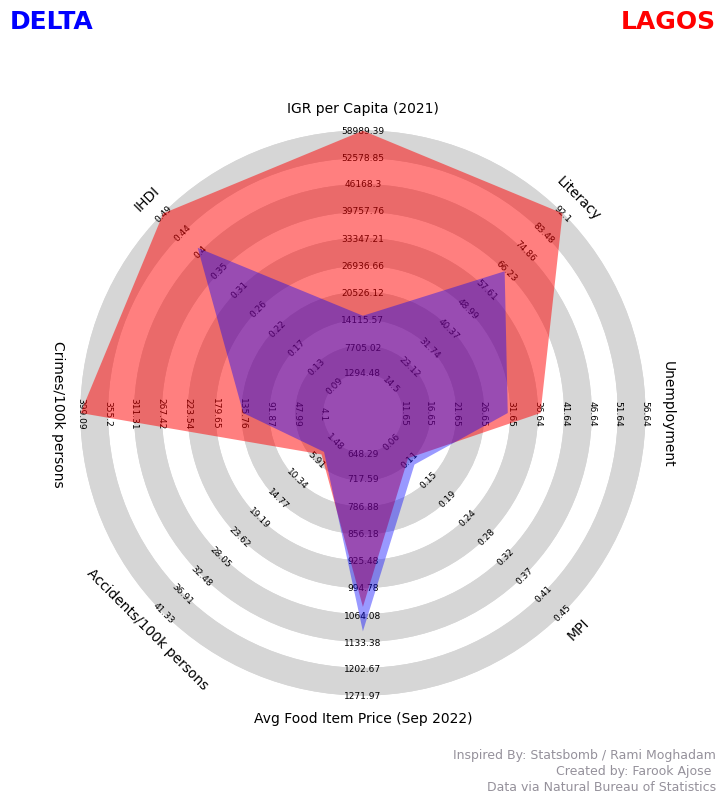

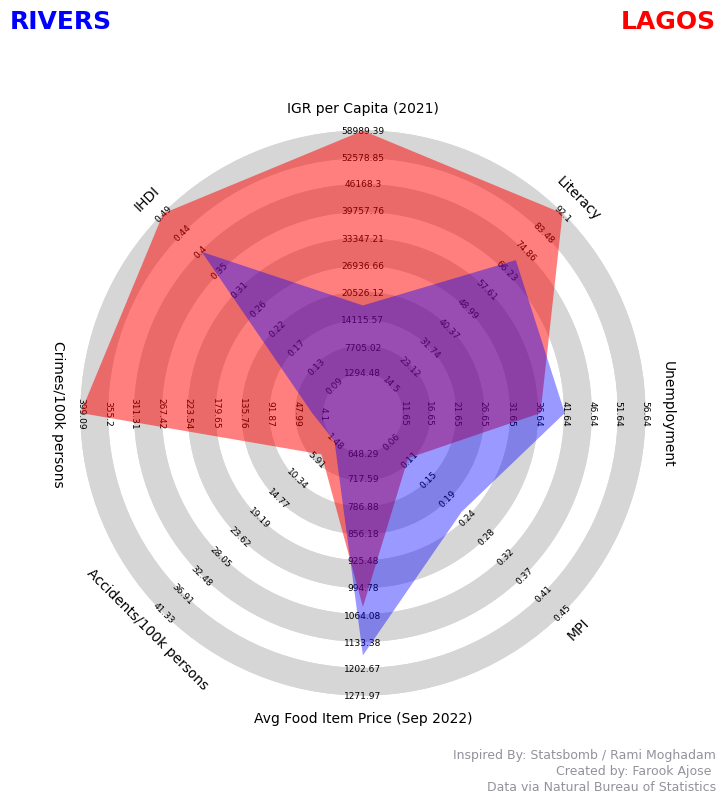

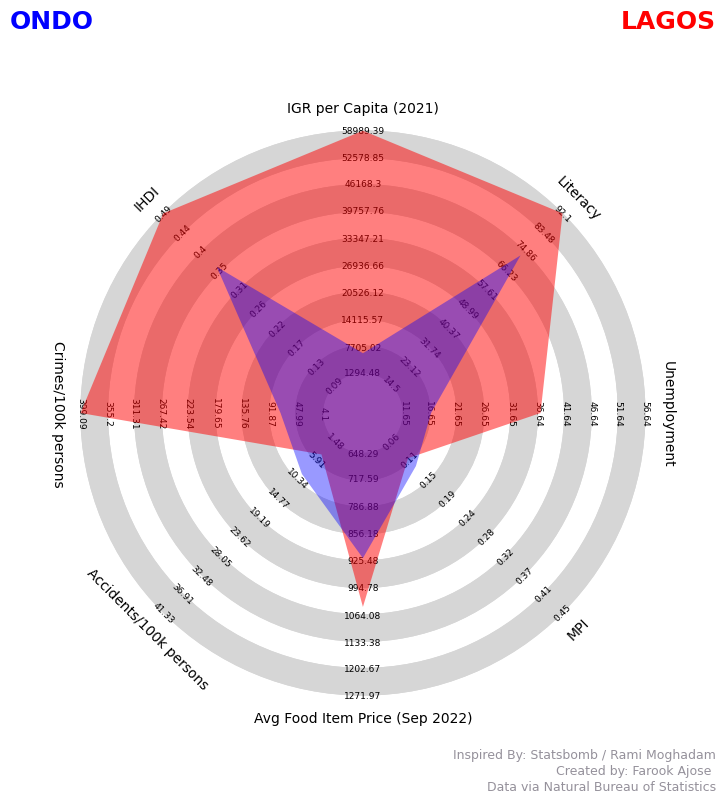

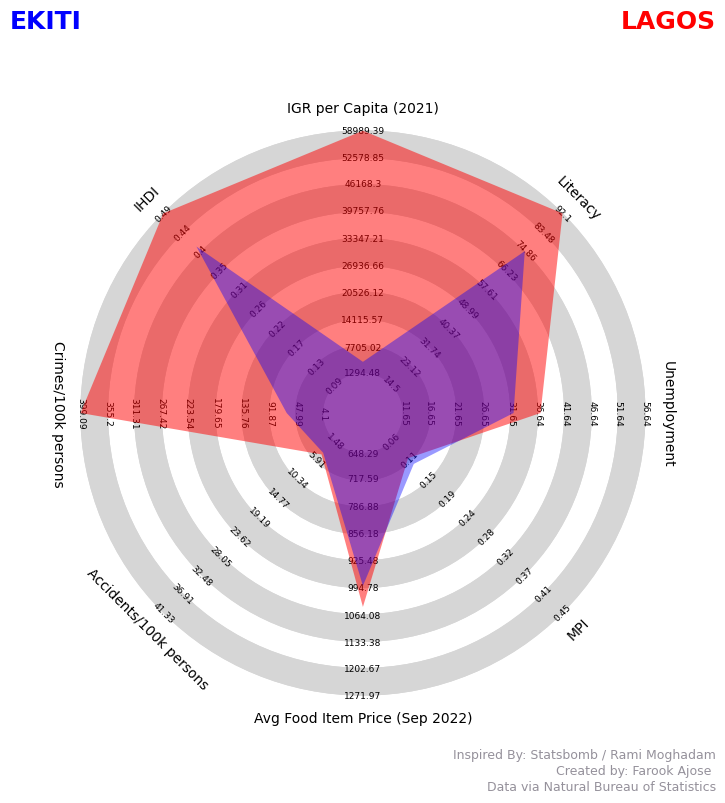

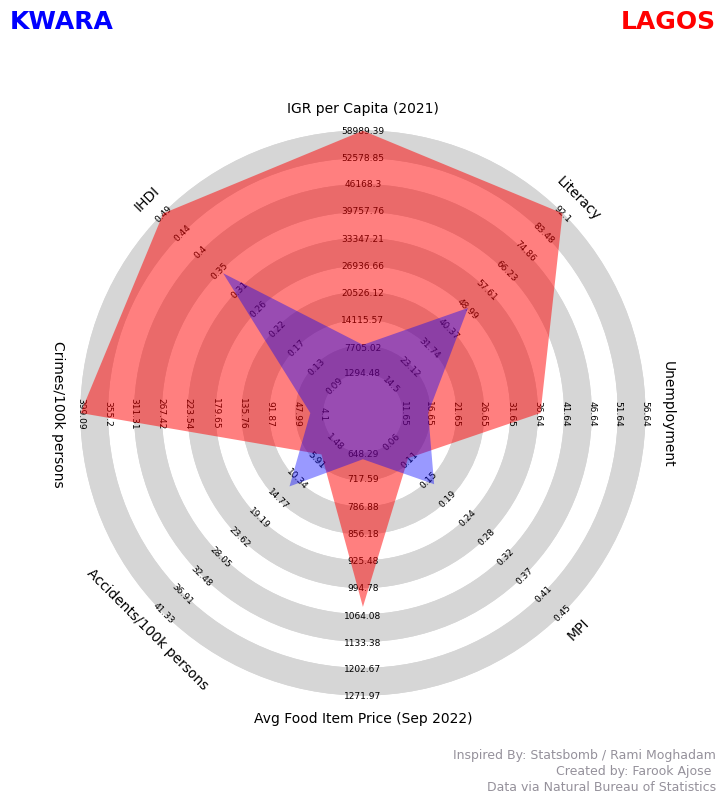

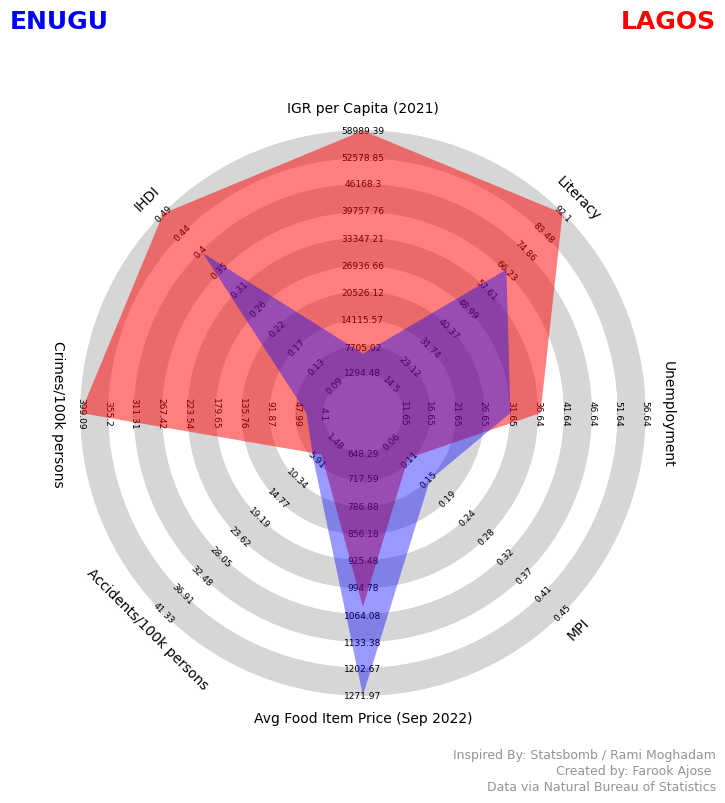

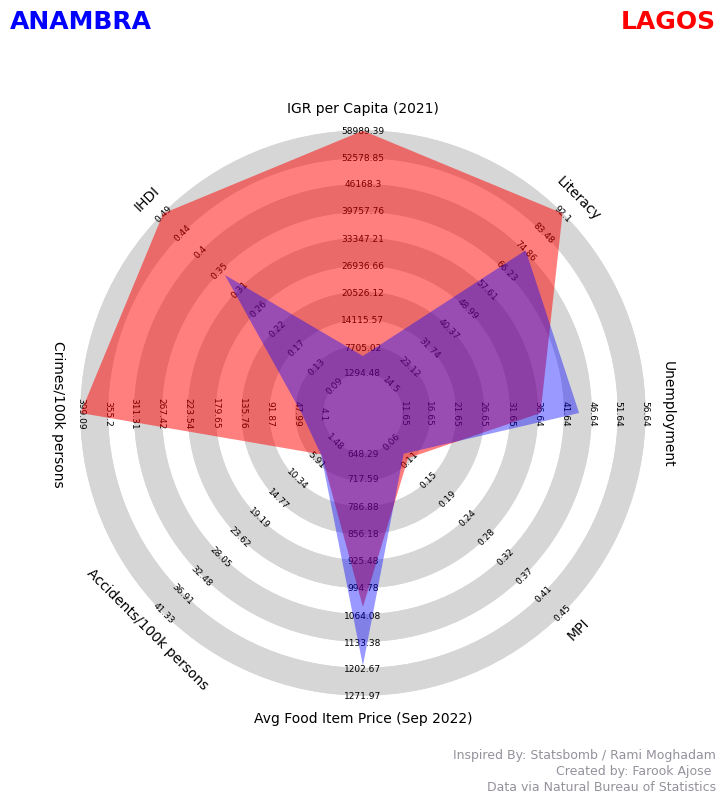

In [6]:
for state in scored_data.index[1:11]:
    compare_states(radar_data, state, "LAGOS")

## Compare a state
Are there any states you'd like to compare? Edit state 1 and state 2 then run.

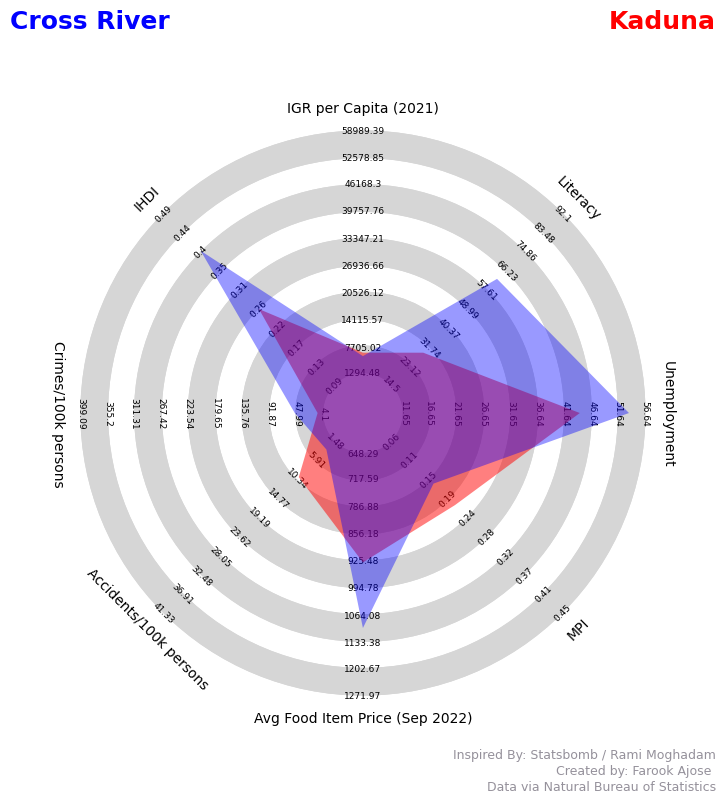

In [7]:
state_1= "Cross River"
state_2= "Kaduna"
compare_states(radar_data, state_1, state_2)

## Bar chart function

Create normalized table

In [8]:
norm_table = pd.DataFrame(
    {
        'IHDI': radar_data.IHDI,
        'IGR Index': radar_data['IGR per Capita (2021)']/max(radar_data['IGR per Capita (2021)']),
        'Literacy': radar_data['Literacy']/100,
        'MPI': radar_data['MPI'],
        'Unemployment': radar_data['Unemployment']/100,
        'Food Price Index': radar_data['Avg Food Item Price (Sep 2022)']/max(radar_data['Avg Food Item Price (Sep 2022)']),
        'Accident Index': radar_data['Accidents/100k persons']/max(radar_data['Accidents/100k persons']),
        'Crime Index': radar_data['Crimes/100k persons']/max(radar_data['Crimes/100k persons'])
    },
    index=radar_data.index
)

norm_table.head()

,IHDI,IGR Index,Literacy,MPI,Unemployment,Food Price Index,Accident Index,Crime Index
STATE,,,,,,,,
LAGOS,0.4852,1.000000,0.921,0.1023,0.371439,0.820069,0.112891,1.000000
FCT,0.4472,0.827552,0.614,0.1744,0.404035,0.954566,1.000000,0.499021
BAYELSA,0.4313,0.093966,0.620,0.2272,0.366846,0.846530,0.048494,0.213560
AKWA IBOM,0.4102,0.111334,0.663,0.2448,0.510036,0.806002,0.036944,0.650359
EKITI,0.4068,0.068916,0.747,0.1154,0.322078,0.778068,0.103262,0.162366


Create function to generate bar plots

In [9]:
import seaborn as sns

def compare_bar(data, sec_state, ref_state, **kwargs):
    
    sns.set_palette("Pastel1")
    fig, ax = plt.subplots(figsize=(10,6))
    selected_states = data.loc[[sec_state.upper(), ref_state.upper()]].transpose()
    selected_states.plot.bar(
                            ax=ax, 
                            ylabel="Normalized Index", 
                          )
    plt.title(
      label = f"State Comparison ({sec_state} vs {ref_state})", 
      # color= 'indianred',
      fontsize=18, 
      # fontweight="bold"
      )
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
    ax.grid(axis = 'y', alpha=0.3, linestyle = '--')
    ax.set_facecolor('#fffcfe')
    ax.set_frame_on(False)
    
    ax.xaxis.set_ticks_position('none') 
    
    plt.figtext(0.05, -0.15, 
                """
                Created by: Farook Ajose
                Sources: National Bureau of Statistics (NBS), BudgIT
                """, ha="left", fontsize=10, fontweight='normal', color='grey')
    

Compare states

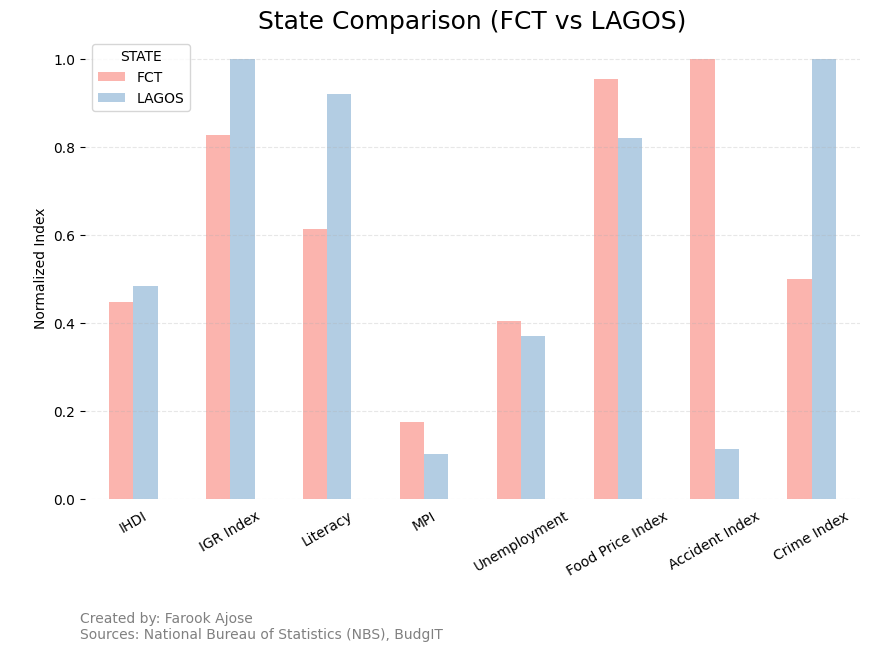

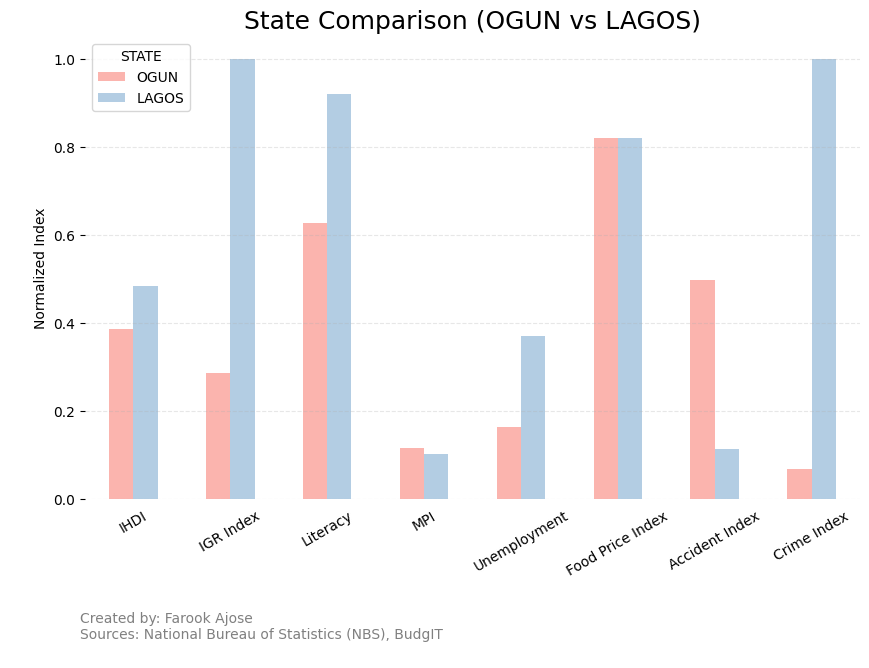

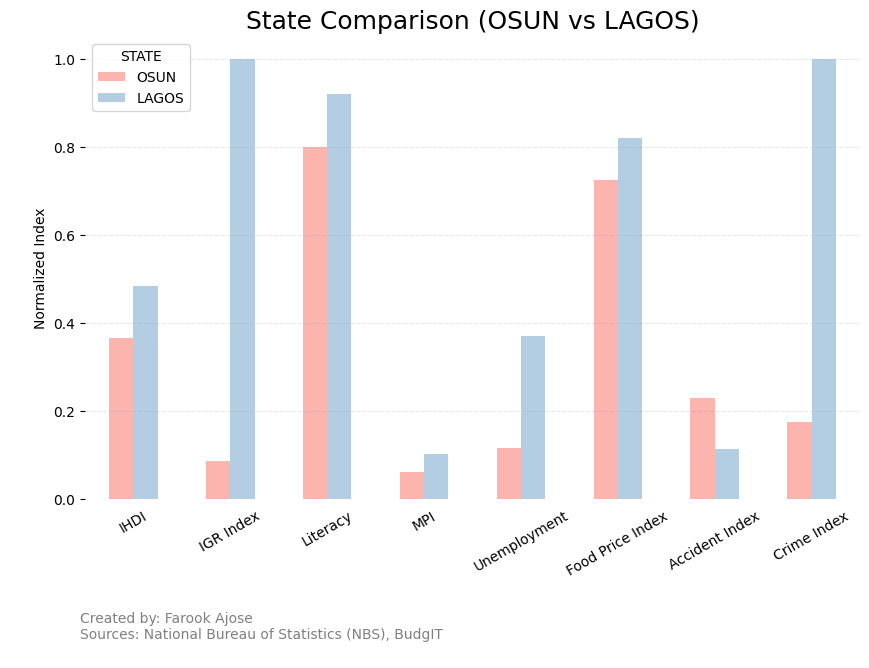

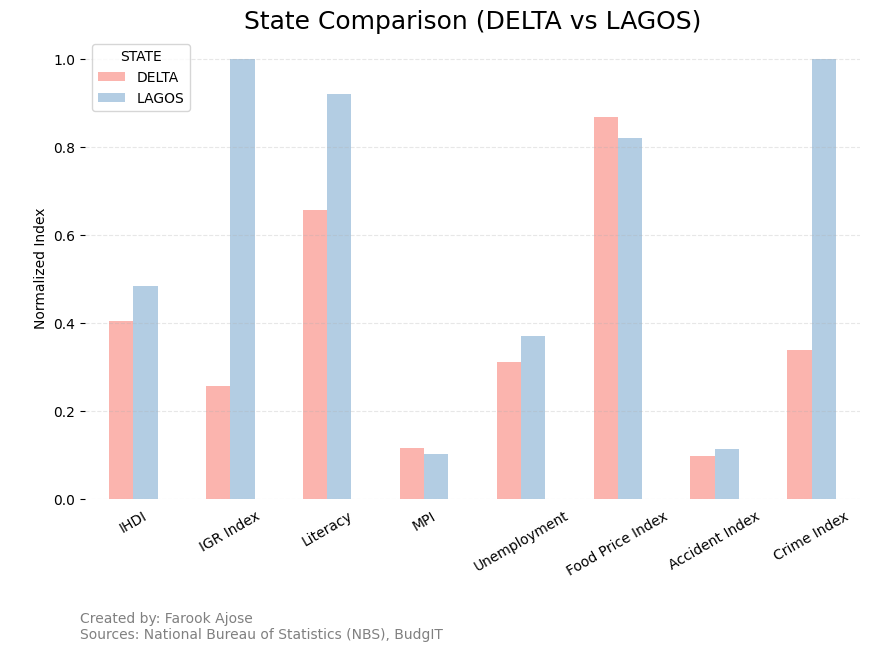

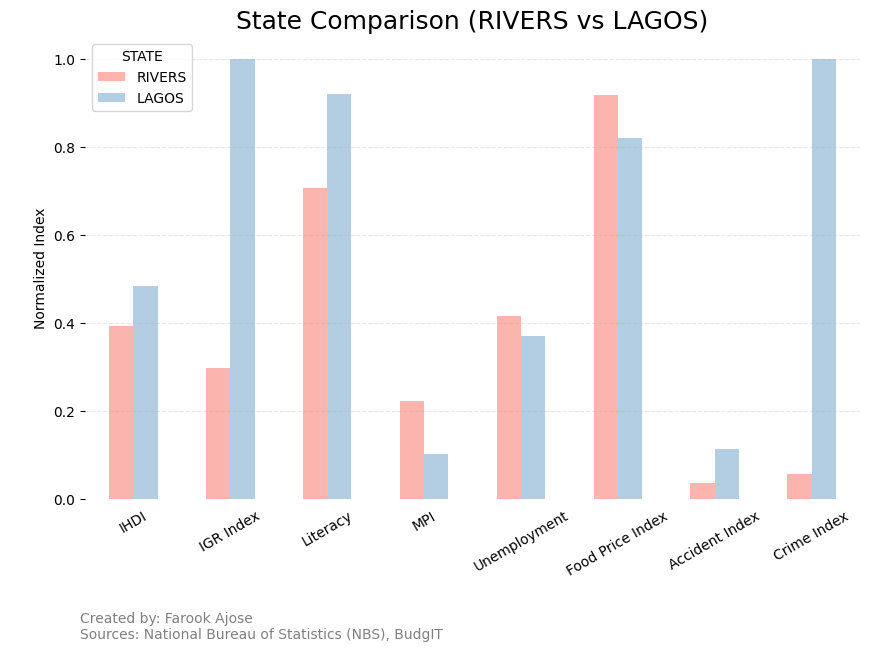

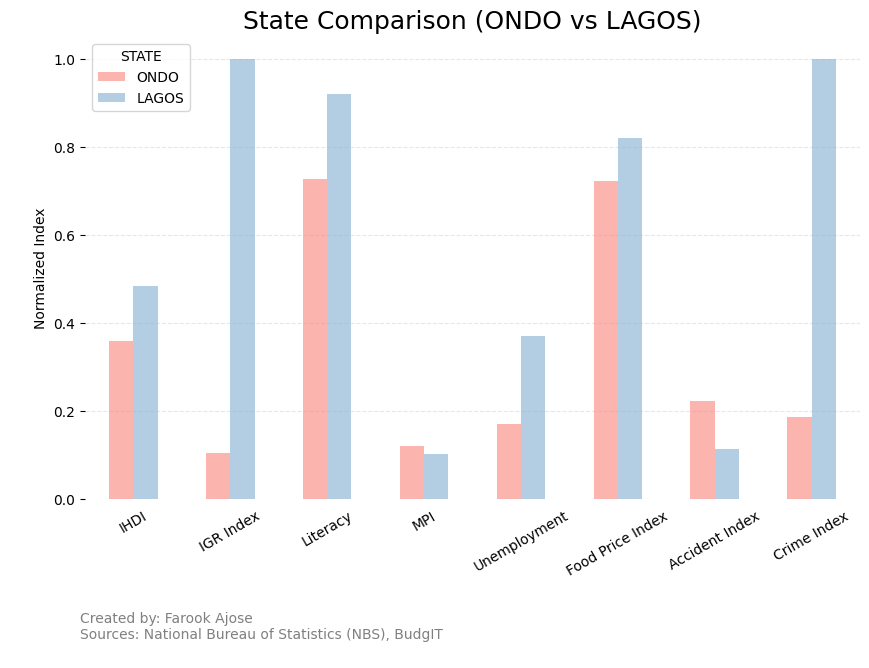

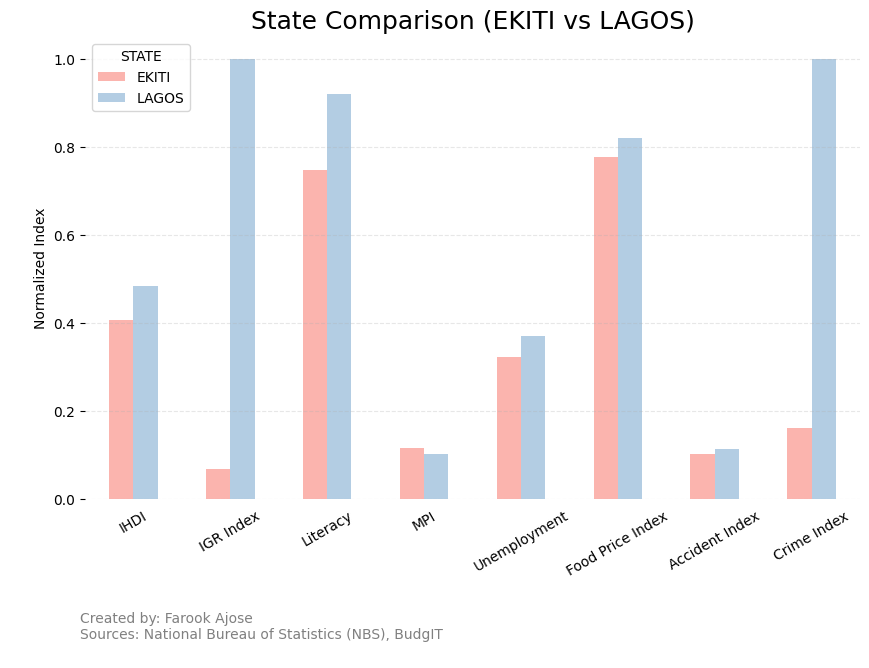

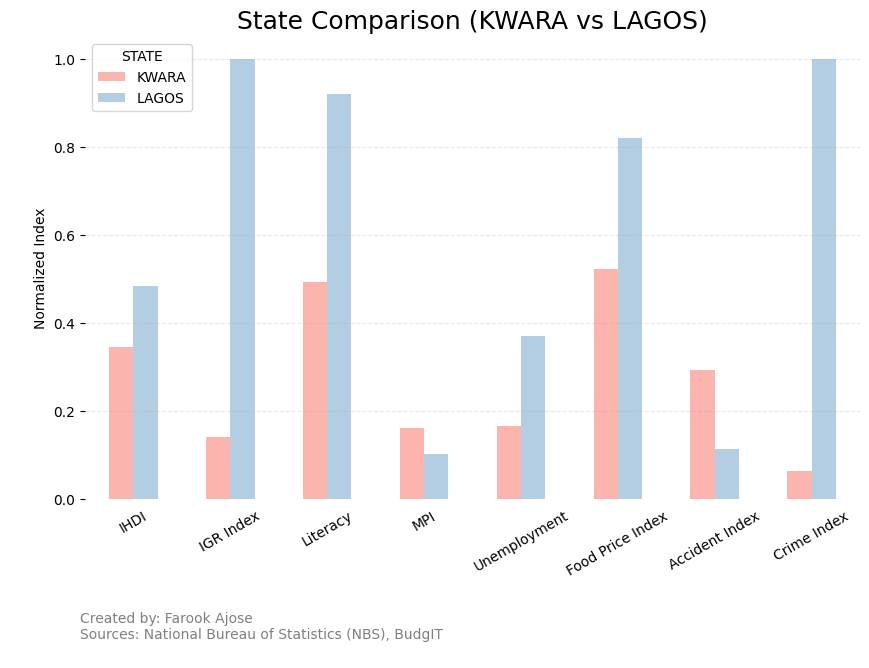

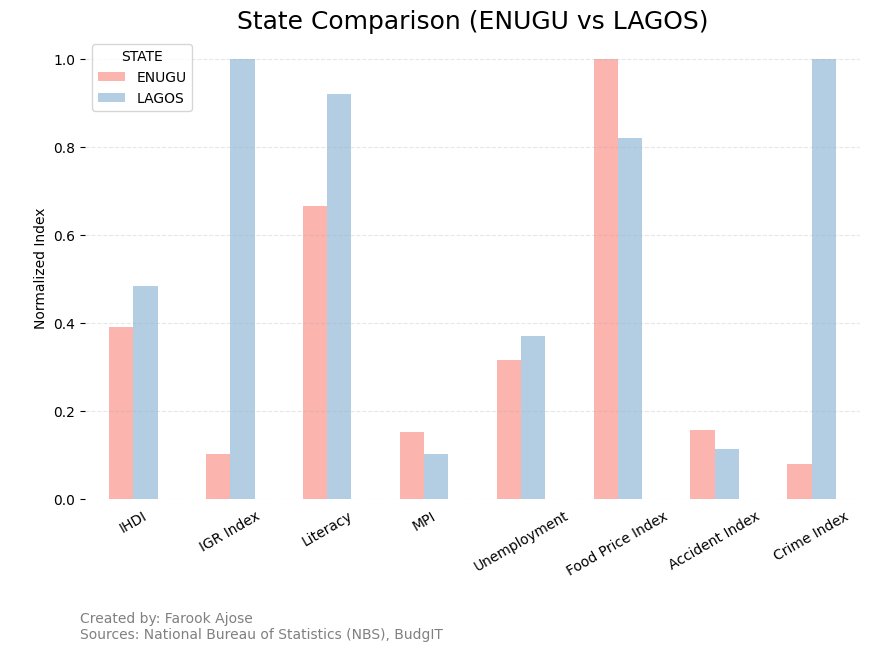

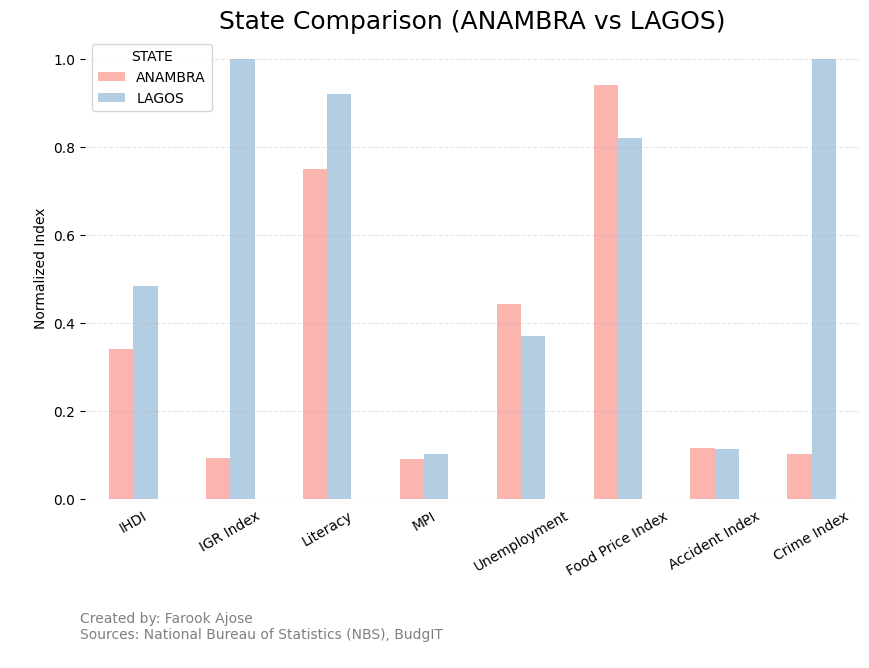

In [10]:
for state in scored_data.index[1:11]:
    compare_bar(norm_table, state, "LAGOS")

Compare any two states you want.

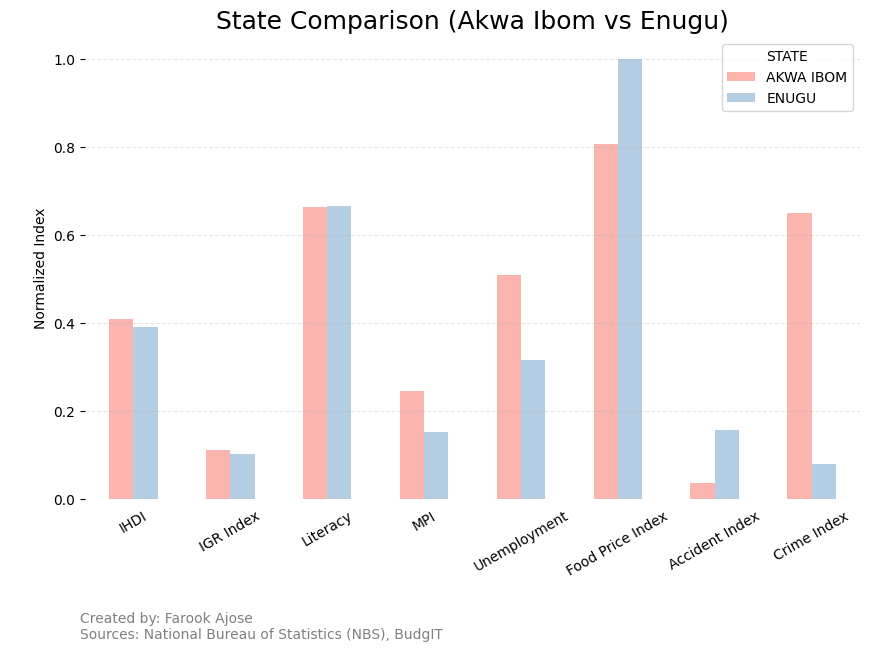

In [11]:
state_1 = "Akwa Ibom"
state_2 = "Enugu"
compare_bar(norm_table, state_1, state_2)